In [ ]:
from google.colab import files

# Upload file manually
uploaded = files.upload()


Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re                                 # Regex for text cleaning
import nltk                               # NLP toolkit
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle                             # Model saving

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv("UpdatedResumeDataSet.csv")

# Show first 10 rows
print("First 10 rows of the dataset:")
print(df.head(5))

# Dataset info
print("\nDataset Information:")
print(df.info())

# Check null values
print("\nNull values in dataset:")
print(df.isnull().sum())


First 10 rows of the dataset:
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None

Null values in dataset:
Category    0
Resume      0
dtype: int64


Dataset contains 962 rows and 2 columns

Missing Values:
Category    0
Resume      0
dtype: int64

Columns:
Index(['Category', 'Resume'], dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None

Unique Resume Categories:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fi

/tmp/ipython-input-4192483077.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')


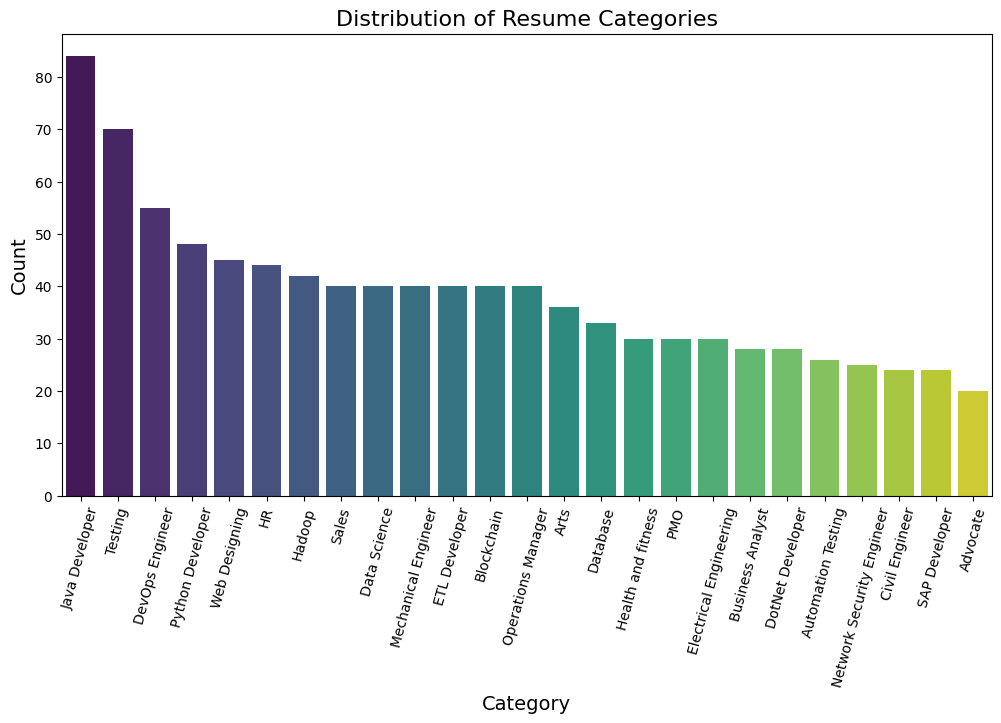

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)

# Shape of dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Checking column names
print("\nColumns:")
print(df.columns)

# Basic info
print("\nDataset Info:")
print(df.info())

# Checking unique categories
print("\nUnique Resume Categories:")
print(df['Category'].value_counts())

# Plot category distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.xticks(rotation=75)
plt.title("Distribution of Resume Categories", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()


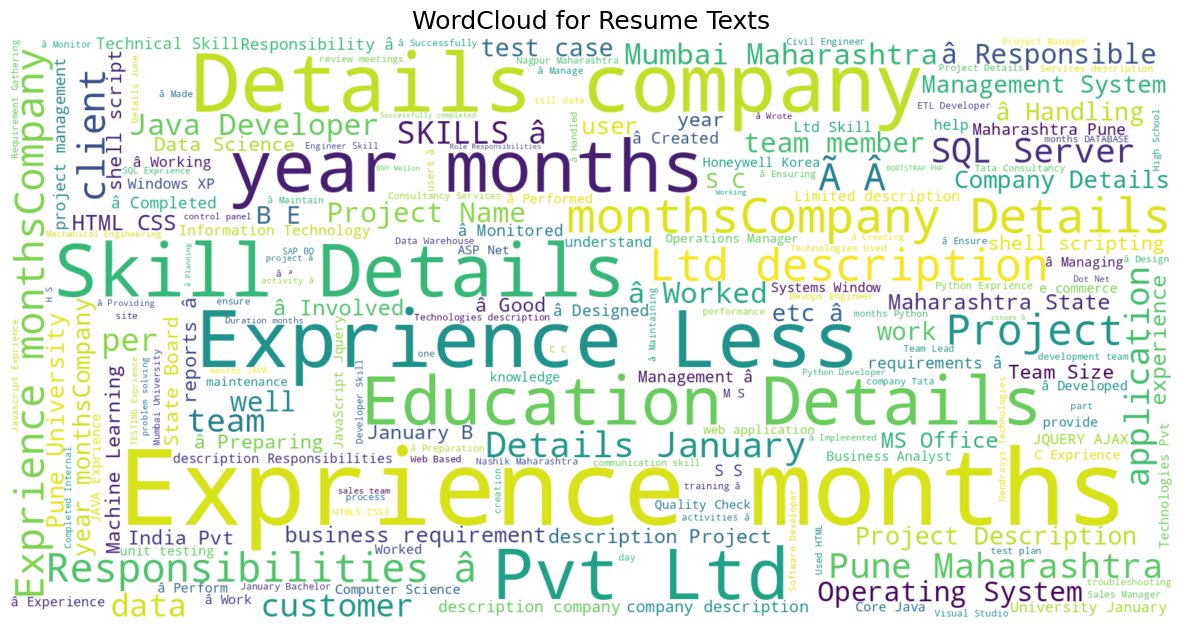

In [ ]:
from wordcloud import WordCloud

# Combine all resumes into one string
text = " ".join(resume for resume in df['Resume'])

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text)

# # Plot the word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for Resume Texts", fontsize=18)
plt.show()


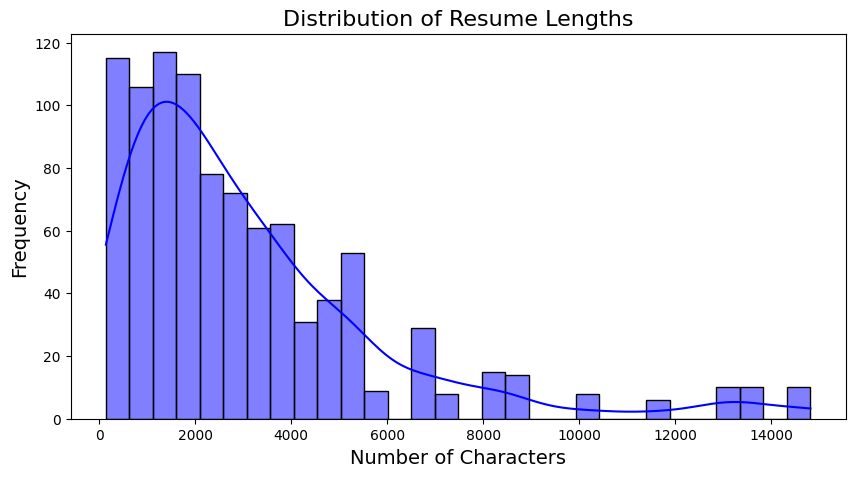

In [ ]:
# Adding a column for resume length
df['Resume_Length'] = df['Resume'].apply(len)

# Plot distribution of resume lengths
plt.figure(figsize=(10,5))
sns.histplot(df['Resume_Length'], kde=True, color='blue', bins=30)
plt.title("Distribution of Resume Lengths", fontsize=16)
plt.xlabel("Number of Characters", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()


/tmp/ipython-input-3246294335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Resume_Length', palette='coolwarm')


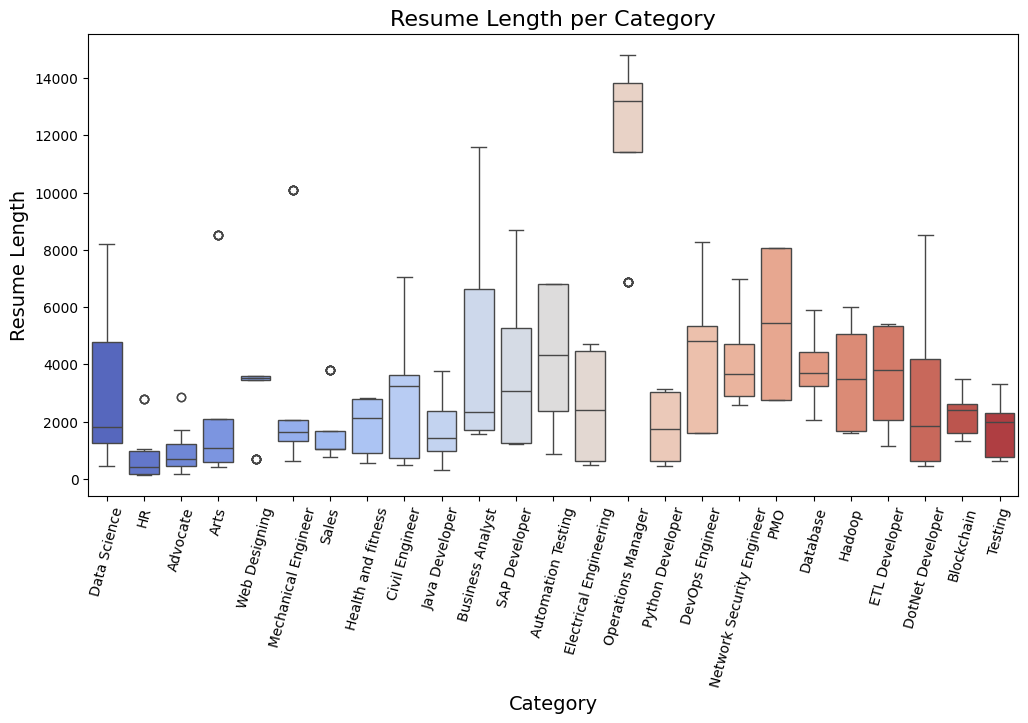

In [ ]:
# Plot the word cloud
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Category', y='Resume_Length', palette='coolwarm')
plt.xticks(rotation=75)
plt.title("Resume Length per Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Resume Length", fontsize=14)
plt.show()


In [ ]:
# NLP tools
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download wordnet
nltk.download('wordnet')

# Text Cleaning Function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only alphabets
    text = text.strip()  # Remove leading/trailing spaces
    return text

# Apply cleaning
df['Cleaned_Resume'] = df['Resume'].apply(clean_text)

# Remove stopwords & lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_tokens(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df['Processed_Resume'] = df['Cleaned_Resume'].apply(preprocess_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Initialize the TF-IDF Vectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Processed_Resume']).toarray()
y = df['Category']


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (769, 3000), (769,)
Testing set: (193, 3000), (193,)


Logistic Regression Accuracy: 0.9948
Naive Bayes Accuracy: 0.9845
Linear SVM Accuracy: 0.9948
Random Forest Accuracy: 1.0000


/tmp/ipython-input-3279759147.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='mako')


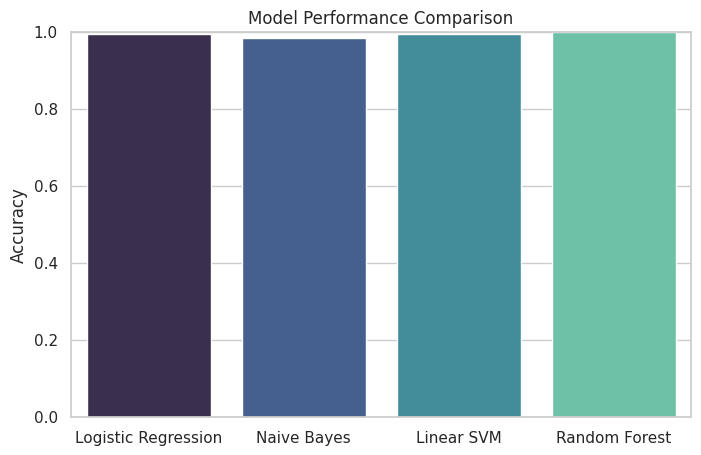

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle




models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier()
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Compare model performance
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='mako')
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)  # Accuracy is always between 0 and 1
plt.show()


Best Model: Random Forest

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      1.00      1.00        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
           

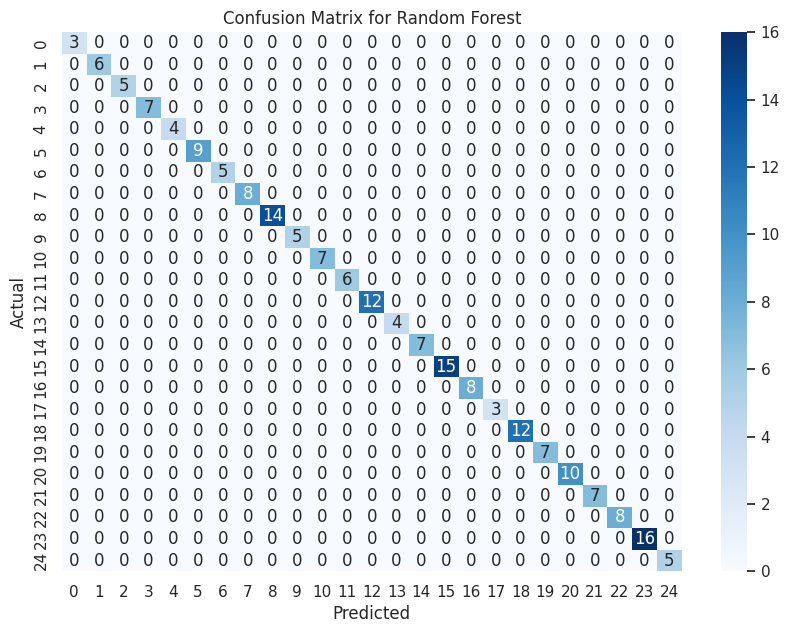

In [ ]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

y_pred = best_model.predict(X_test)

print(f"Best Model: {best_model_name}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Example for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [100, 200]
}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=3, verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'C': 10, 'max_iter': 100}


In [ ]:
# Save the trained best model to a file (serialization)
# 'wb' → write in binary mode
with open('resume_classifier.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the fitted TF-IDF vectorizer
# This ensures we can transform new resume text in the same way as training data
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [ ]:
# Predicts resume category by cleaning, preprocessing, converting text to TF-IDF, and classifying with the trained model
def predict_resume_category(resume_text):
    cleaned = clean_text(resume_text)
    processed = preprocess_tokens(cleaned)
    vectorized = tfidf.transform([processed])
    prediction = best_model.predict(vectorized)
    return prediction[0]

# Example:
print(predict_resume_category("Experienced Python developer with knowledge in AI and ML."))


Python Developer
